In [82]:
%autosave 10

Autosaving every 10 seconds


In [1]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures
from sklearn import metrics

In [2]:
df = pd.read_csv(r'E:/Technocolabs/cleaned_data.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [3]:
df['default payment next month'].mean()

0.2217971797179718

In [4]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

In [5]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [6]:
log_reg_new = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
log_reg_new

LogisticRegression(solver='warn')

In [7]:
log_reg_new.C = 0.1
log_reg_new.solver = 'liblinear'
log_reg_new

LogisticRegression(C=0.1, solver='liblinear')

In [8]:
X = df['EDUCATION'][0:10].values.reshape(-1,1)
X

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]], dtype=int64)

In [9]:
y = df['default payment next month'][0:10].values
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [10]:
log_reg_new.fit(X,y)

LogisticRegression(C=0.1, solver='liblinear')

In [11]:
new_X = df['EDUCATION'][10:20].values.reshape(-1,1)
new_X

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]], dtype=int64)

In [12]:
log_reg_new.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [54]:
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [55]:
#Generating Synthetic Data
np.random.seed(seed=1)
X = np.random.uniform(low=0.0, high=10.0, size=(1000,))
X[0:10]

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00])

In [15]:
np.random.seed(seed=1)
slope = 0.25
intercept = -1.25
y = slope * X + np.random.normal(loc=0.0, scale=1.0, size=(1000,)) + intercept

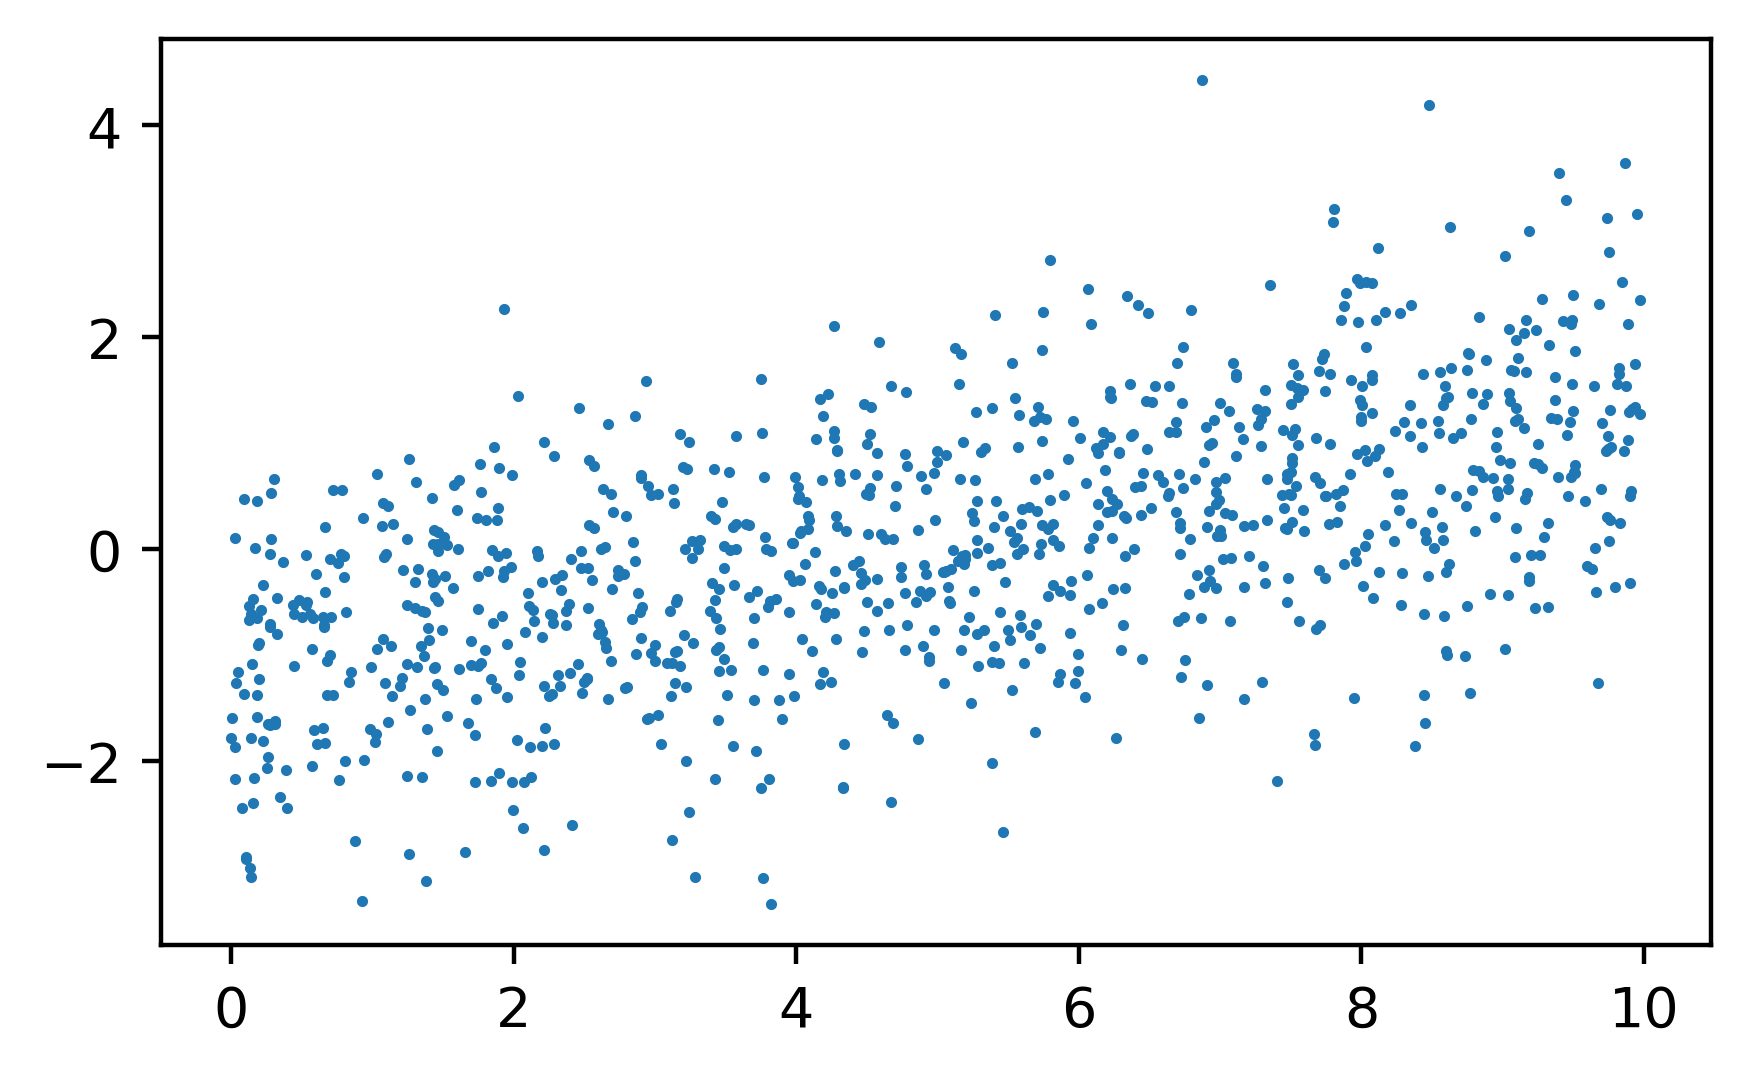

In [16]:
plt.rcParams["figure.figsize"] = (5,3)
plt.scatter(X,y,s=1)

In [17]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [18]:
lin_reg.fit(X.reshape(-1,1), y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

-1.161256600282589
[0.24002588]


In [19]:
y_pred = lin_reg.predict(X.reshape(-1,1))


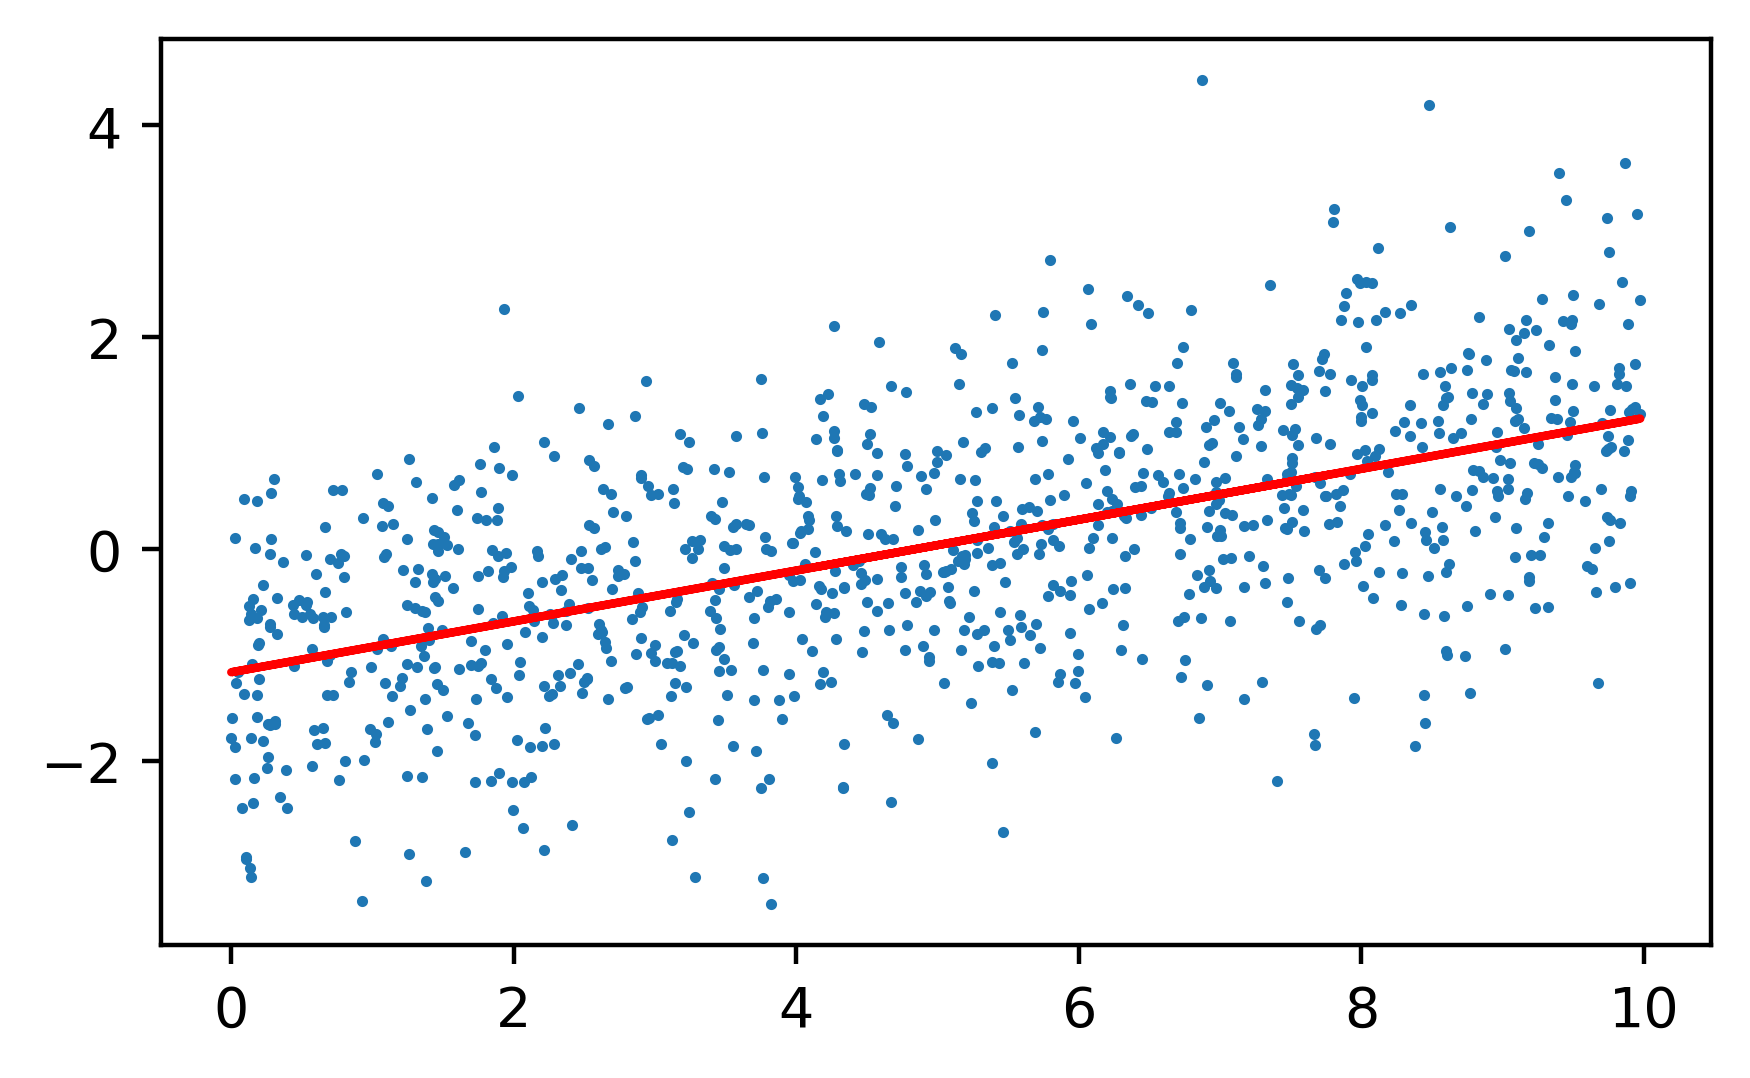

In [20]:
plt.scatter(X,y,s=1)
plt.plot(X,y_pred,'r')

**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
df['LIMIT_BAL'].values.reshape(-1,1), df['default payment next month'].values,
test_size=0.2, random_state=24)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [23]:
print(np.mean(y_train), np.mean(y_test))

0.223102526838873 0.21657603600225014


_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [24]:
from sklearn.linear_model import LogisticRegression
example_lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True, \
                                intercept_scaling=1, max_iter=100, multi_class='auto', n_jobs=None, \
                                penalty='l2', random_state=None, solver='liblinear', tol=0.0001, \
                                verbose=0, warm_start=False)
example_lr.fit(X_train, y_train)
y_pred = example_lr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
is_correct = y_pred == y_test
np.mean(is_correct)

0.7834239639977498

In [26]:
print(example_lr.score(X_test, y_test))
metrics.accuracy_score(y_test, y_pred)

0.7834239639977498


0.7834239639977498

In [27]:
P = sum(y_test)
P

1155

In [28]:
TP = sum( (y_test==1) & (y_pred==1) )
TP

0

In [29]:
TPR = TP/P
TPR

0.0

In [30]:
FN = sum( (y_test==1) & (y_pred==0) )
FN

1155

In [31]:
FNR = FN/P
FNR

1.0

In [32]:
N = sum(y_test==0)
TN = sum((y_test==0) & (y_pred==0))
FP = sum((y_test==0) & (y_pred==1))
TNR = TN/N
FPR = FP/N
print('The true negative rate is {} and the false positive rate is {}'.format(TNR, FPR))

The true negative rate is 1.0 and the false positive rate is 0.0


In [33]:
metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]], dtype=int64)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [34]:
y_pred_proba = example_lr.predict_proba(X_test)
y_pred_proba

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393434, 0.33606566]])

In [35]:
prob_sum = np.sum(y_pred_proba,1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [36]:
prob_sum.shape

(5333,)

In [37]:
np.unique(prob_sum)

array([1.])

In [38]:
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.25173076, 0.415703  , 0.20395547, ..., 0.415703  , 0.17278502,
       0.33606566])

(array([280., 509., 414., 538., 587., 610., 412., 491., 782., 710.]),
 array([0.00644178, 0.05409607, 0.10175036, 0.14940464, 0.19705893,
        0.24471322, 0.29236751, 0.34002179, 0.38767608, 0.43533037,
        0.48298465]),
 <BarContainer object of 10 artists>)

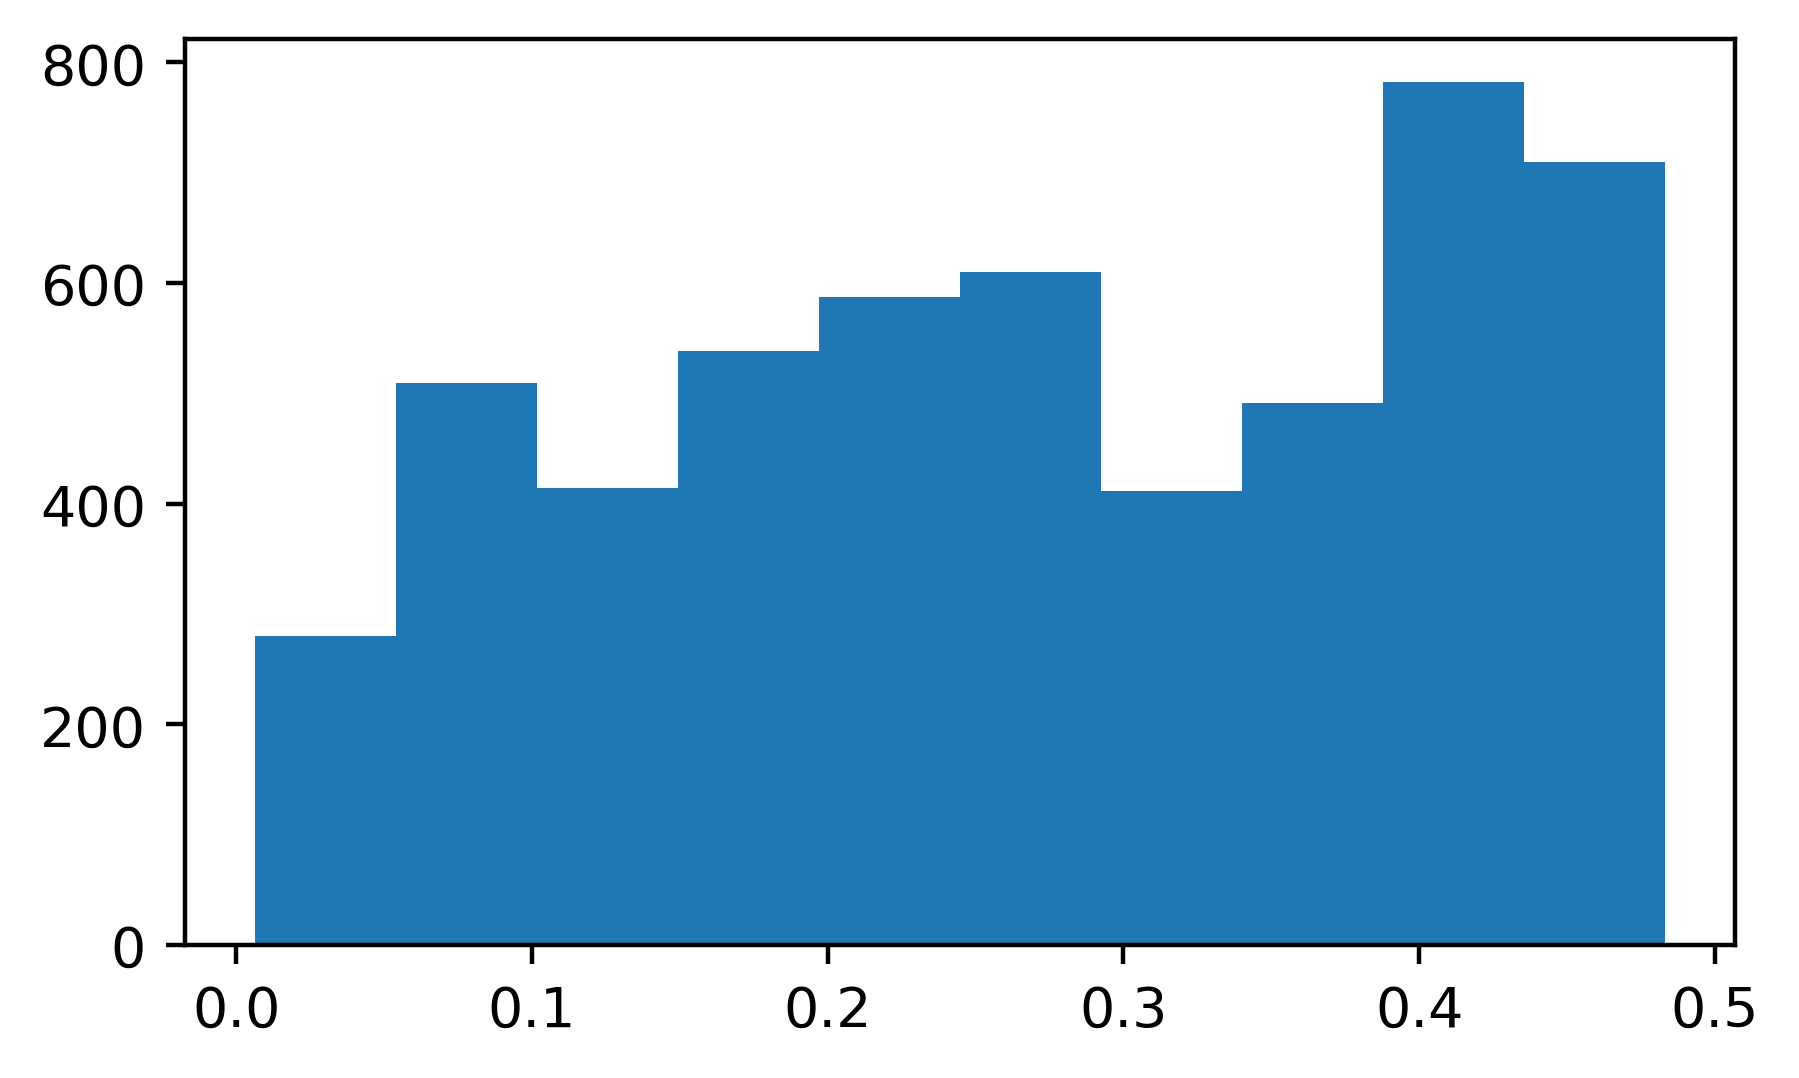

In [39]:
plt.hist(pos_proba)

Text(0, 0.5, 'Number of samples')

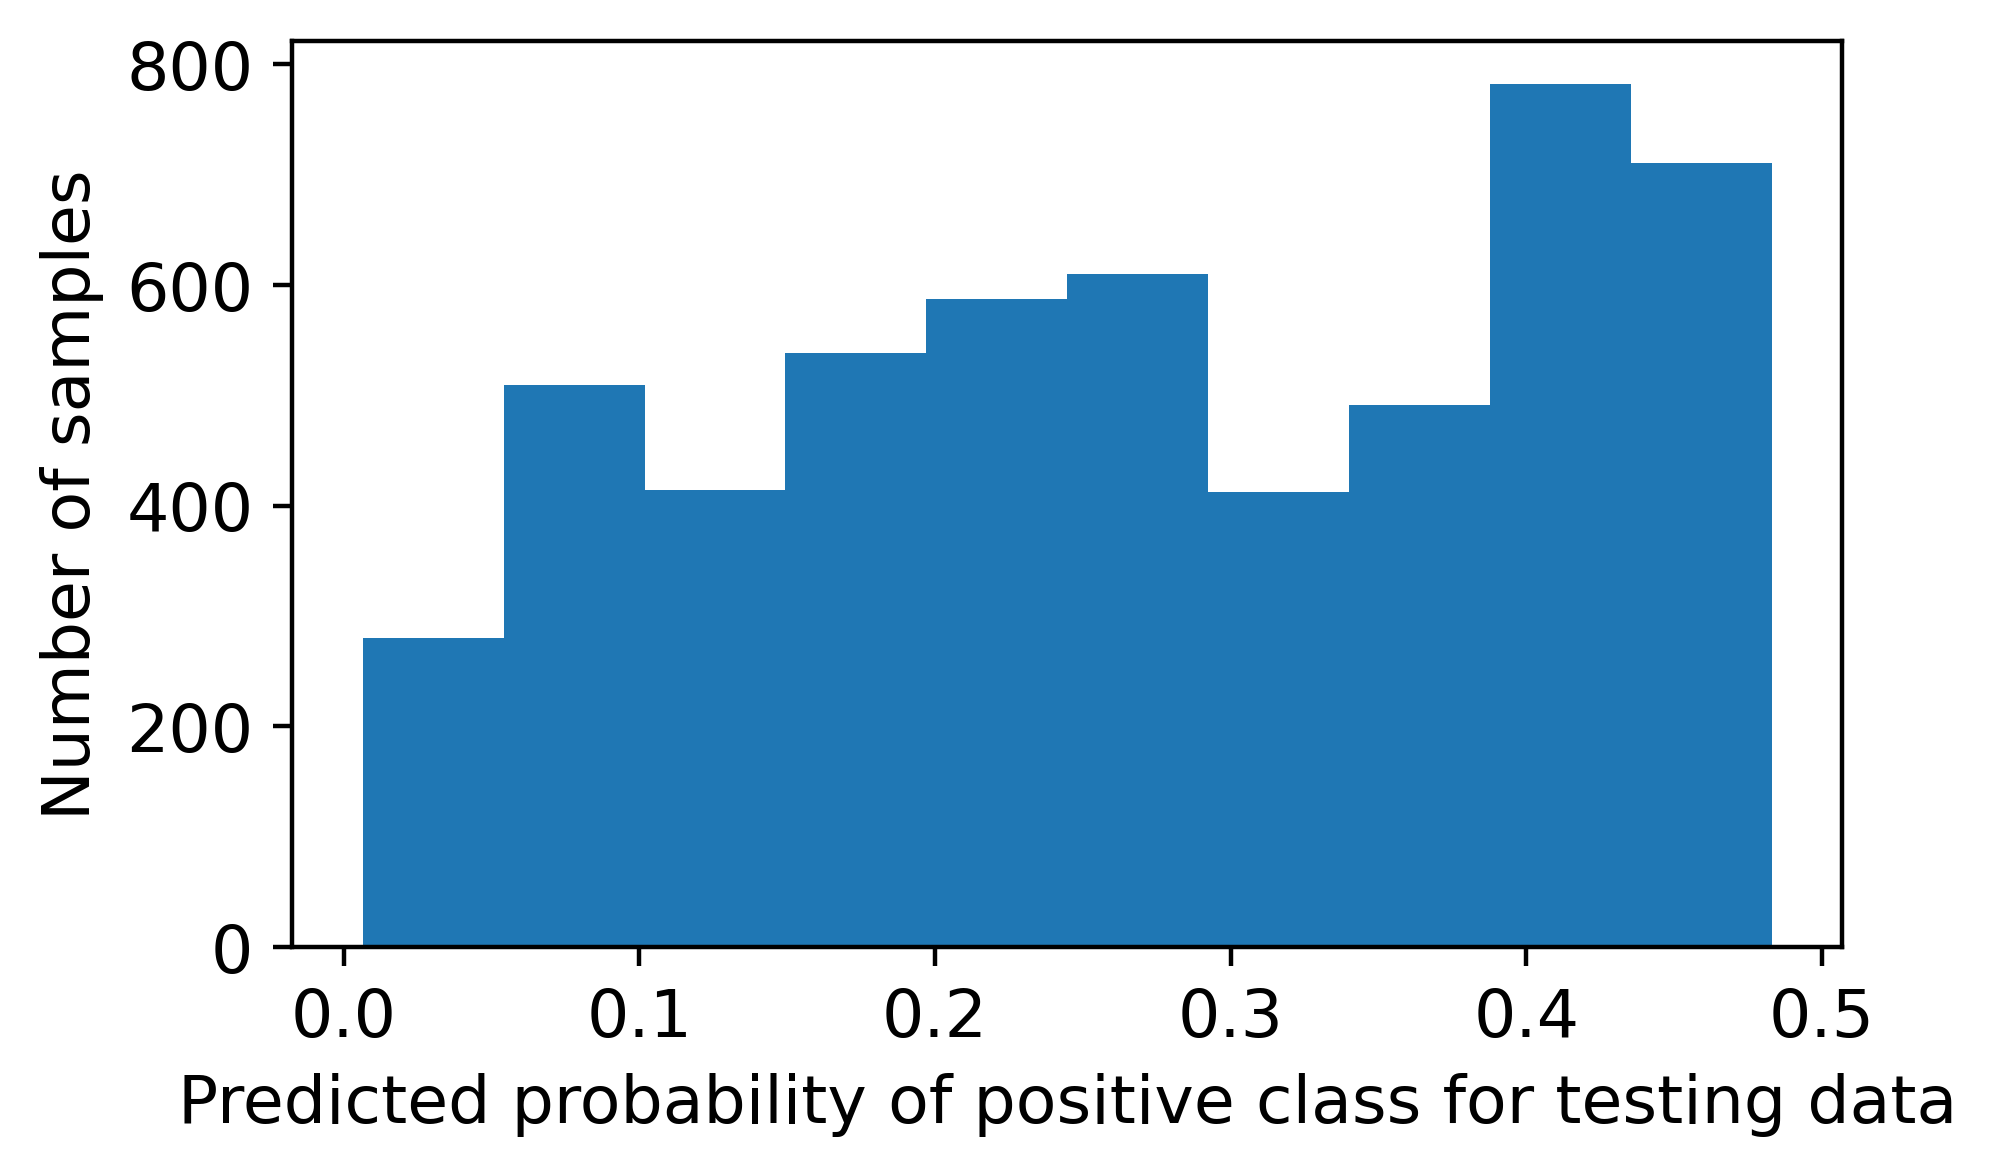

In [40]:
mpl.rcParams['font.size'] = 12
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for testing data')
plt.ylabel('Number of samples')

In [41]:
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

Text(0, 0.5, 'Number of samples')

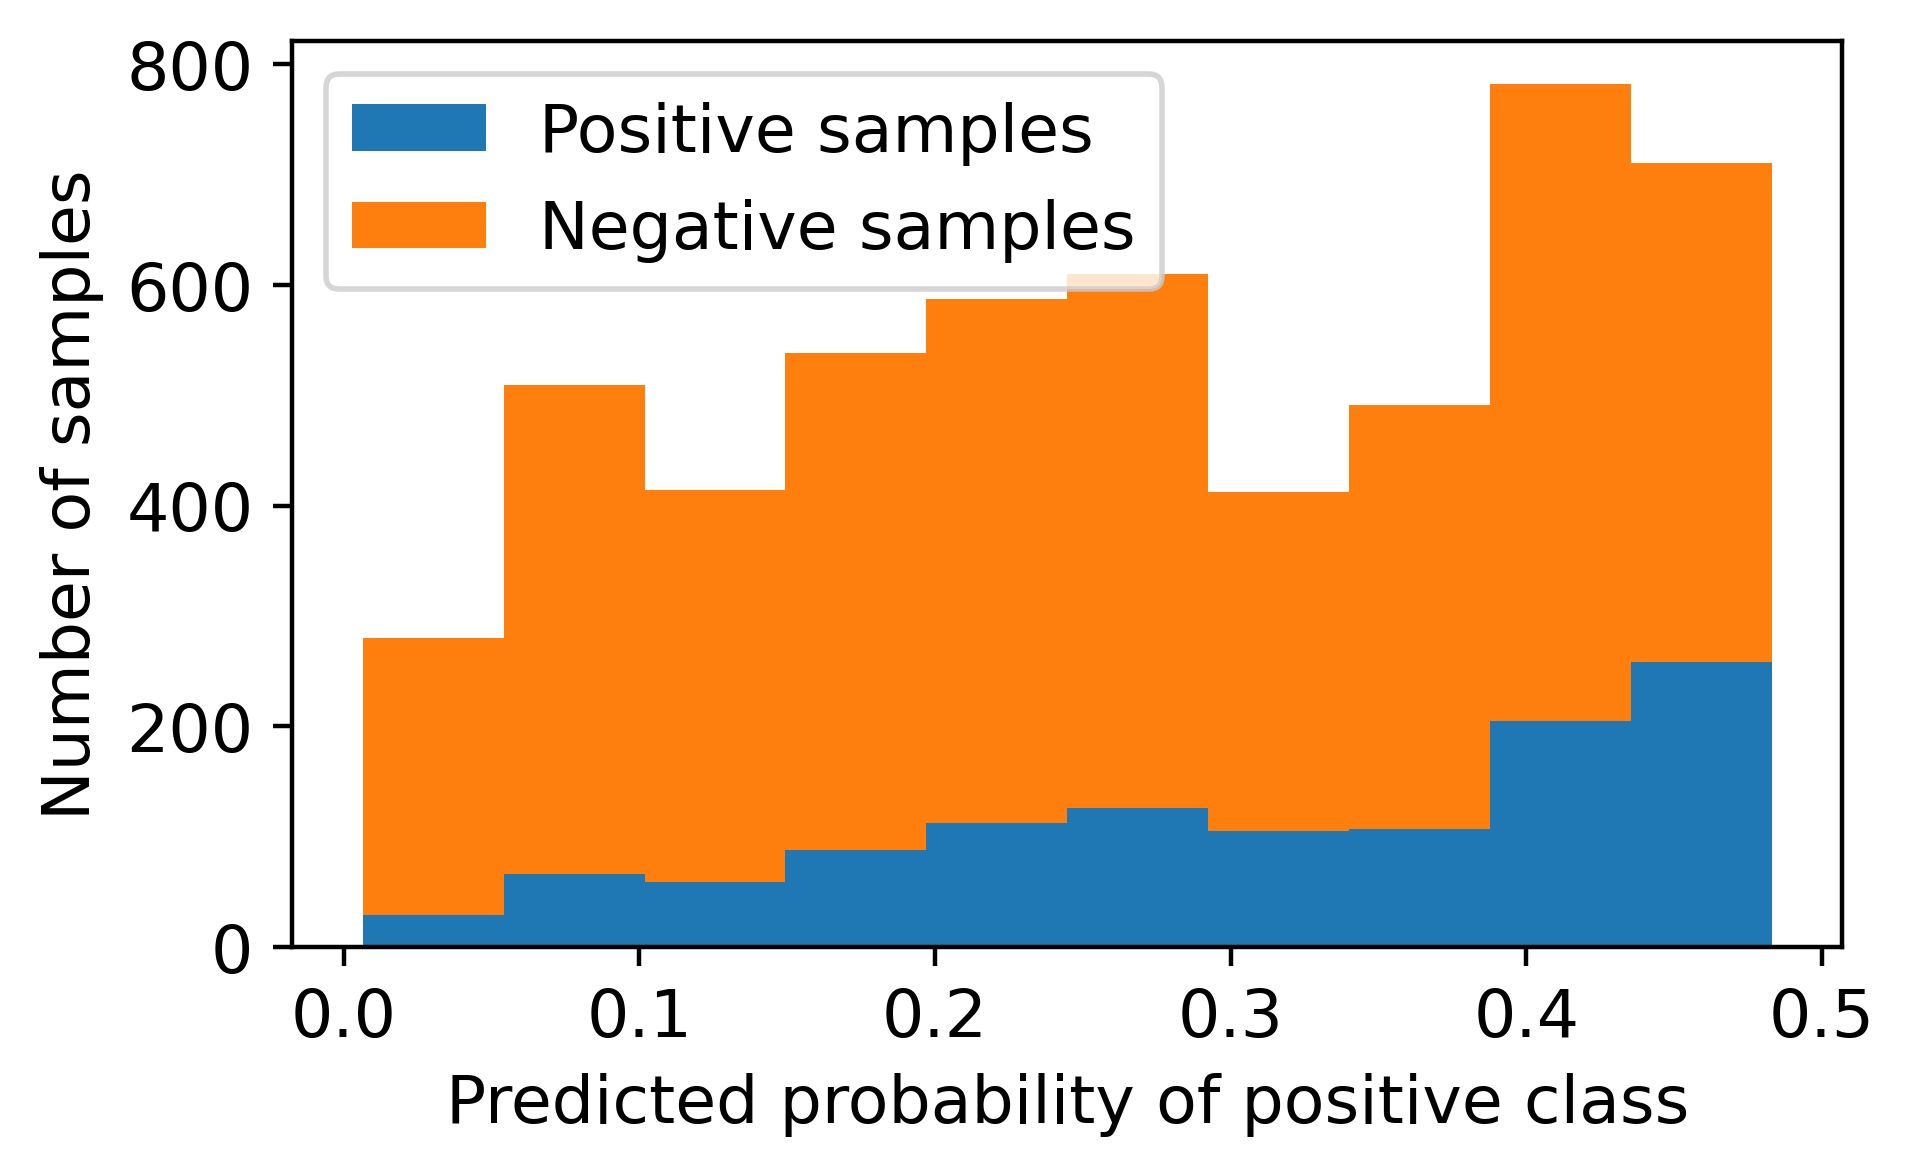

In [42]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [68]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)
auc_logistic=metrics.auc(fpr,tpr)
print('FPR:\n',fpr,'\n','TPR\n',tpr,'\n','THRESHOLDS\n',thresholds,'\n','AUC\n',auc_logistic)

FPR:
 [0.         0.01244615 0.06390618 0.10818573 0.11393011 0.2209191
 0.24629009 0.2663954  0.32048827 0.3382001  0.36955481 0.38942078
 0.41168023 0.43752992 0.46146482 0.50335089 0.52752513 0.5454763
 0.57946386 0.58784107 0.64121589 0.66850168 0.68597415 0.71325993
 0.73719483 0.74892293 0.7673528  0.77692676 0.79104835 0.8025371
 0.82431786 0.83389181 0.84657731 0.85495452 0.86213499 0.87170895
 0.90234562 0.90641455 0.91191958 0.92053614 0.9305888  0.93322164
 0.93992341 0.94375299 0.94614648 0.95213021 0.95595979 0.95931067
 0.96242221 0.96553375 0.99258018 0.99305888 0.99377693 0.99377693
 0.99401628 0.99473432 0.99521302 0.99593107 0.99688846 0.99736716
 0.99832456 0.99880326 0.9995213  0.99976065 1.        ] 
 TPR
 [0.         0.03376623 0.13852814 0.22337662 0.23809524 0.36709957
 0.4008658  0.42597403 0.47619048 0.49350649 0.53766234 0.55411255
 0.58441558 0.60952381 0.63549784 0.67359307 0.69350649 0.7038961
 0.73766234 0.74112554 0.79047619 0.80692641 0.82077922 0.83809

_________________________________________________________________________
**Now, plot the ROC curve.**


Text(0.5, 1.0, 'ROC curve(auc = 0.620)')

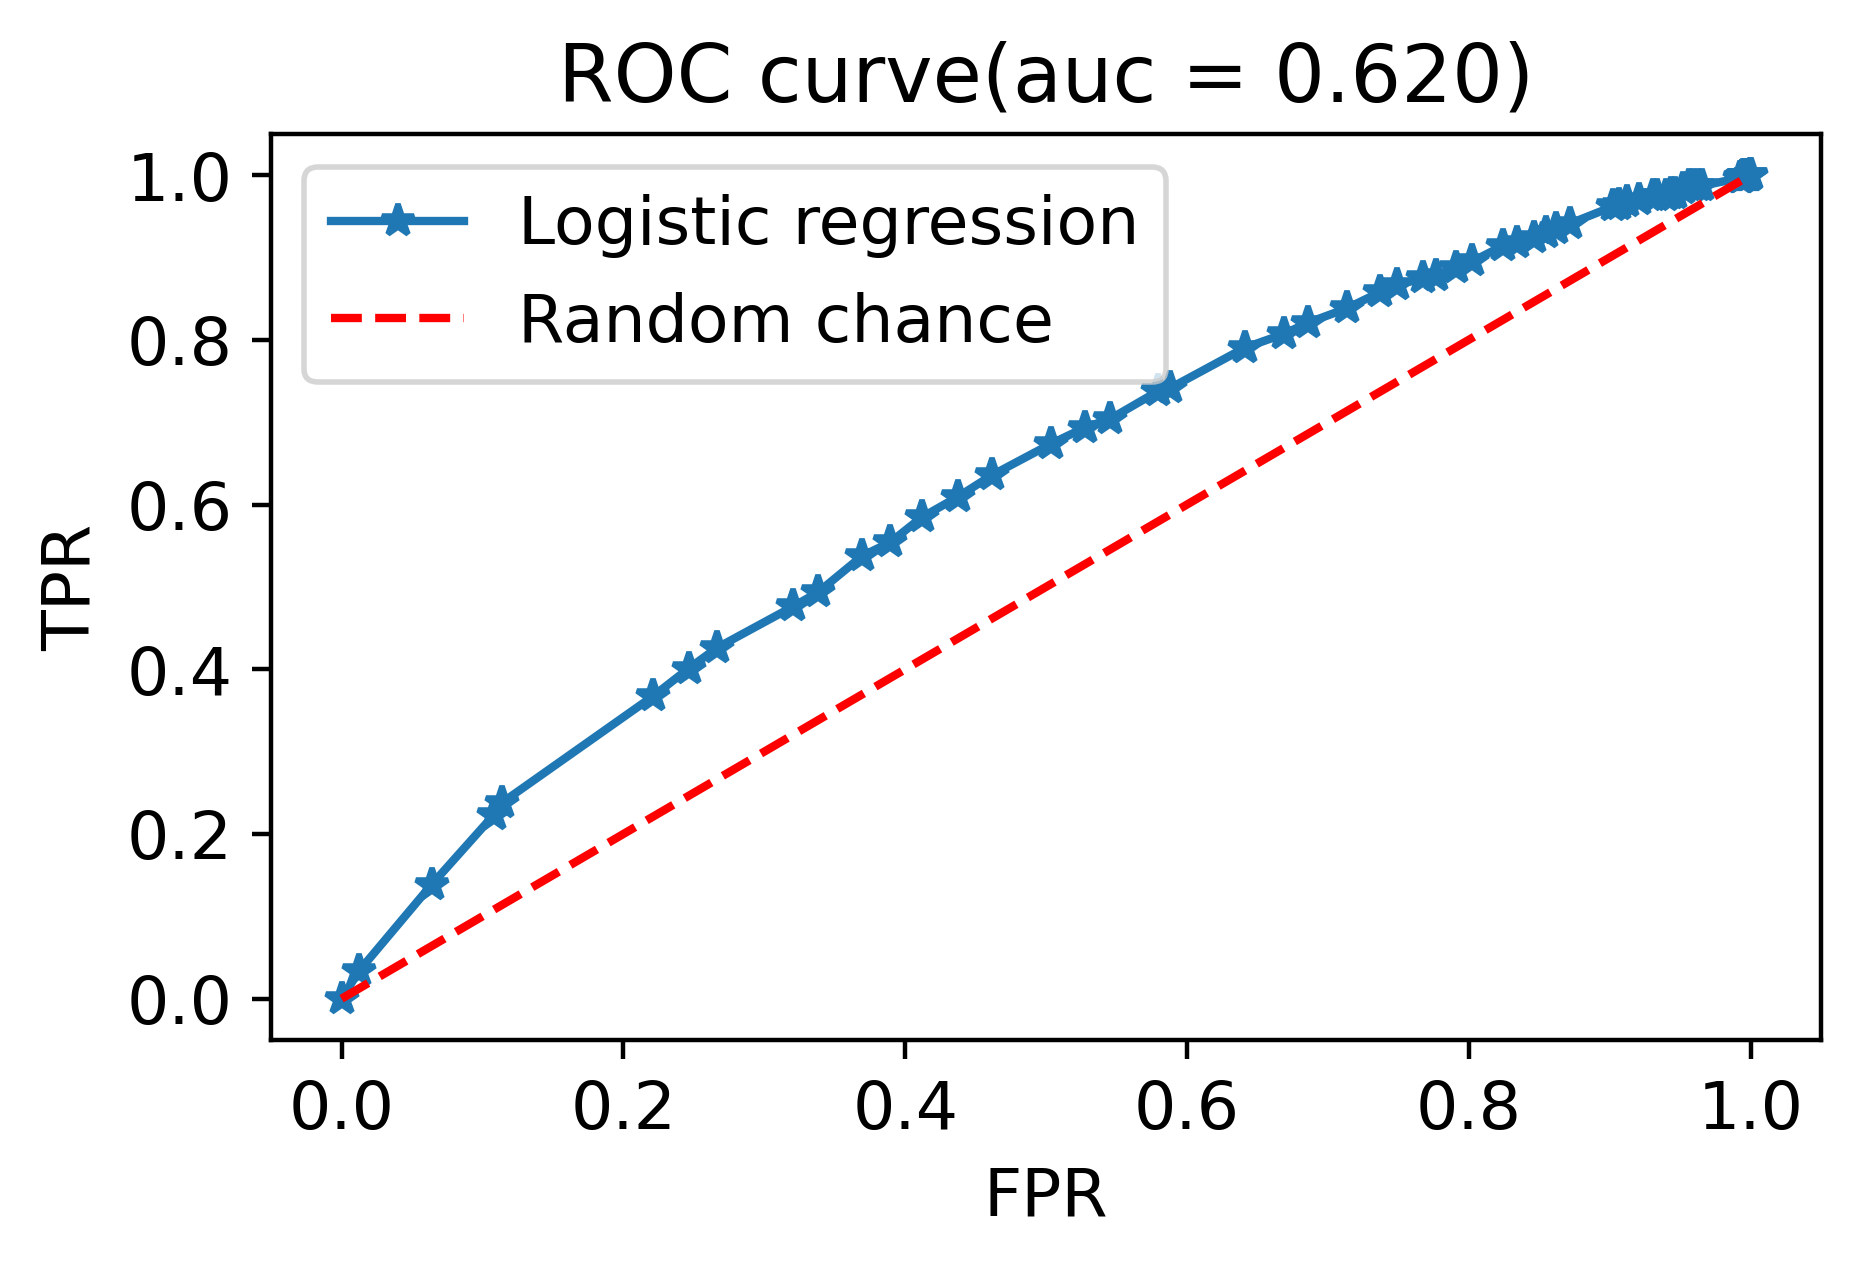

In [58]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')#plotting the no skill line to get a comparison visually
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve(auc = %0.3f)'% auc_logistic)

In [45]:
thresholds

array([1.48298465, 0.48298465, 0.46600867, 0.44911106, 0.4323301 ,
       0.415703  , 0.3992656 , 0.38305207, 0.3670946 , 0.35142324,
       0.33606566, 0.321047  , 0.30638978, 0.29211383, 0.27823623,
       0.26477132, 0.25173076, 0.23912359, 0.2269563 , 0.21523299,
       0.20395547, 0.19312344, 0.18273464, 0.17278502, 0.16326891,
       0.15417922, 0.14550758, 0.13724452, 0.12937966, 0.12190182,
       0.11479918, 0.10805946, 0.10166997, 0.09561779, 0.08988983,
       0.08447295, 0.07935404, 0.07452008, 0.0699582 , 0.06565578,
       0.06160044, 0.05778008, 0.05418298, 0.05079775, 0.04761337,
       0.04461922, 0.0418051 , 0.03916119, 0.03667808, 0.0343468 ,
       0.03215875, 0.03010574, 0.02817998, 0.02637405, 0.02468092,
       0.0230939 , 0.02021324, 0.01890793, 0.01654057, 0.01546869,
       0.01446524, 0.01033455, 0.00844134, 0.0078901 , 0.00644178])

In [46]:
metrics.roc_auc_score(y_test, pos_proba)#area under the curve is calculated to almost 62%

0.6201990844642832

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [71]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, pos_proba)
print('PRECISION:\n',precision,'\n','RECALL\n',recall,'\n','THRESHOLDS\n',thresholds)

PRECISION:
 [0.21661665 0.21651032 0.21663225 0.21667293 0.21671362 0.21687653
 0.21695807 0.21712135 0.21724398 0.21728488 0.2173258  0.21715363
 0.21719457 0.21704695 0.21716981 0.21725179 0.22033243 0.22073643
 0.22129396 0.22189753 0.22198318 0.22200354 0.22244133 0.22283792
 0.22392516 0.22441652 0.22553363 0.22670997 0.22714286 0.22761729
 0.22985832 0.2305063  0.23116659 0.231755   0.23327465 0.23466667
 0.23569638 0.23654424 0.23784926 0.23956357 0.24237288 0.24342913
 0.24518744 0.24855794 0.25020134 0.25417595 0.25845411 0.26031164
 0.26293661 0.26655574 0.27004512 0.27573253 0.27804107 0.28183716
 0.28231142 0.28683603 0.28744327 0.29115934 0.30654206 0.31032172
 0.31477357 0.36617843 0.36338028 0.37470726 0.42857143 1.        ] 
 RECALL
 [1.         0.9991342  0.9991342  0.9991342  0.9991342  0.9991342
 0.9991342  0.9991342  0.9991342  0.9991342  0.9991342  0.9974026
 0.9974026  0.9965368  0.9965368  0.9965368  0.98701299 0.98614719
 0.98614719 0.98614719 0.98268398 0.97662

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


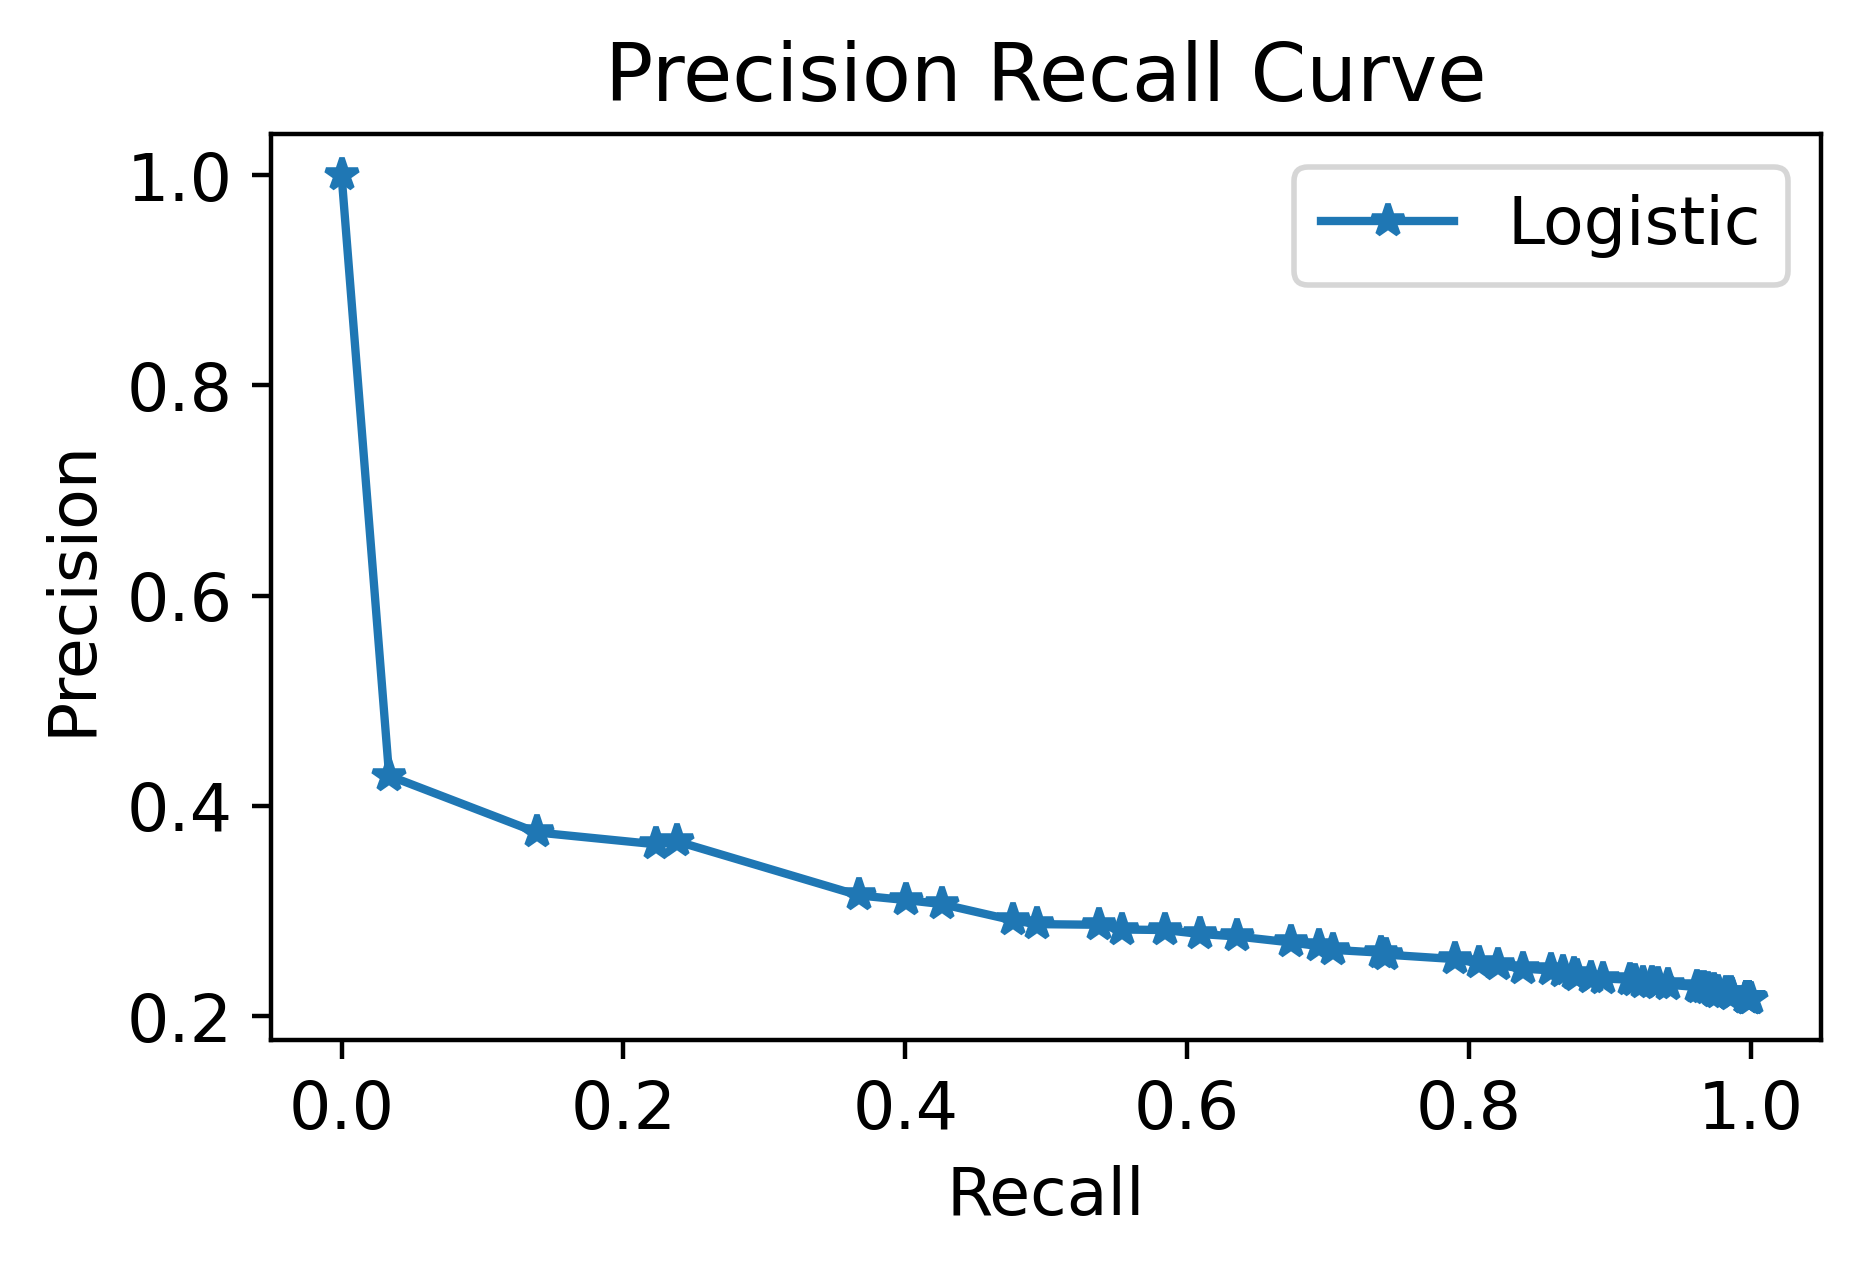

In [72]:
plt.plot(recall, precision, '*-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(['Logistic'])
plt.title('Precision Recall Curve')
plt.show()

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [49]:
metrics.auc(recall, precision)

0.31566964427378624

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [75]:
y_train_prob = example_lr.predict_proba(X_train)
train_pos_prob = y_train_prob[:,1]
fpr,tpr,thresholds = metrics.roc_curve(y_train, train_pos_prob)
auc_logistic_train=metrics.auc(fpr,tpr)
print('FPR:\n',fpr,'\n','TPR\n',tpr,'\n','THRESHOLDS\n',thresholds,'\n','AUC\n',auc_logistic)

FPR:
 [0.         0.01303403 0.01309438 0.06885107 0.11356505 0.11965967
 0.22350953 0.2483104  0.27087859 0.3224113  0.34365194 0.37678011
 0.39548636 0.41841661 0.44249336 0.46735457 0.50591359 0.52980932
 0.55020517 0.58622979 0.59353126 0.64735699 0.67366643 0.69032102
 0.71741492 0.73925899 0.75187063 0.7711803  0.78047309 0.79905865
 0.81160994 0.83116099 0.84208303 0.85336713 0.85336713 0.85970311
 0.86778904 0.87623703 0.90707217 0.90912382 0.91497707 0.92161477
 0.93211441 0.93519189 0.94170891 0.94460536 0.94792421 0.95347574
 0.95601014 0.95902727 0.96228578 0.96439778 0.99245716 0.99312093
 0.99396573 0.99456915 0.99517258 0.99553464 0.99583635 0.99619841
 0.99650012 0.99692252 0.99740526 0.99758629 0.99782766 0.99812937
 0.99825006 0.99843109 0.99855177 0.99867246 0.9987328  0.99903452
 0.99921554 0.99933623 0.99945692 0.99945692 0.99969829 0.99975863
 1.        ] 
 TPR
 [0.         0.02878756 0.02878756 0.13385165 0.22252574 0.2363942
 0.36814457 0.40470687 0.43664635 0.4

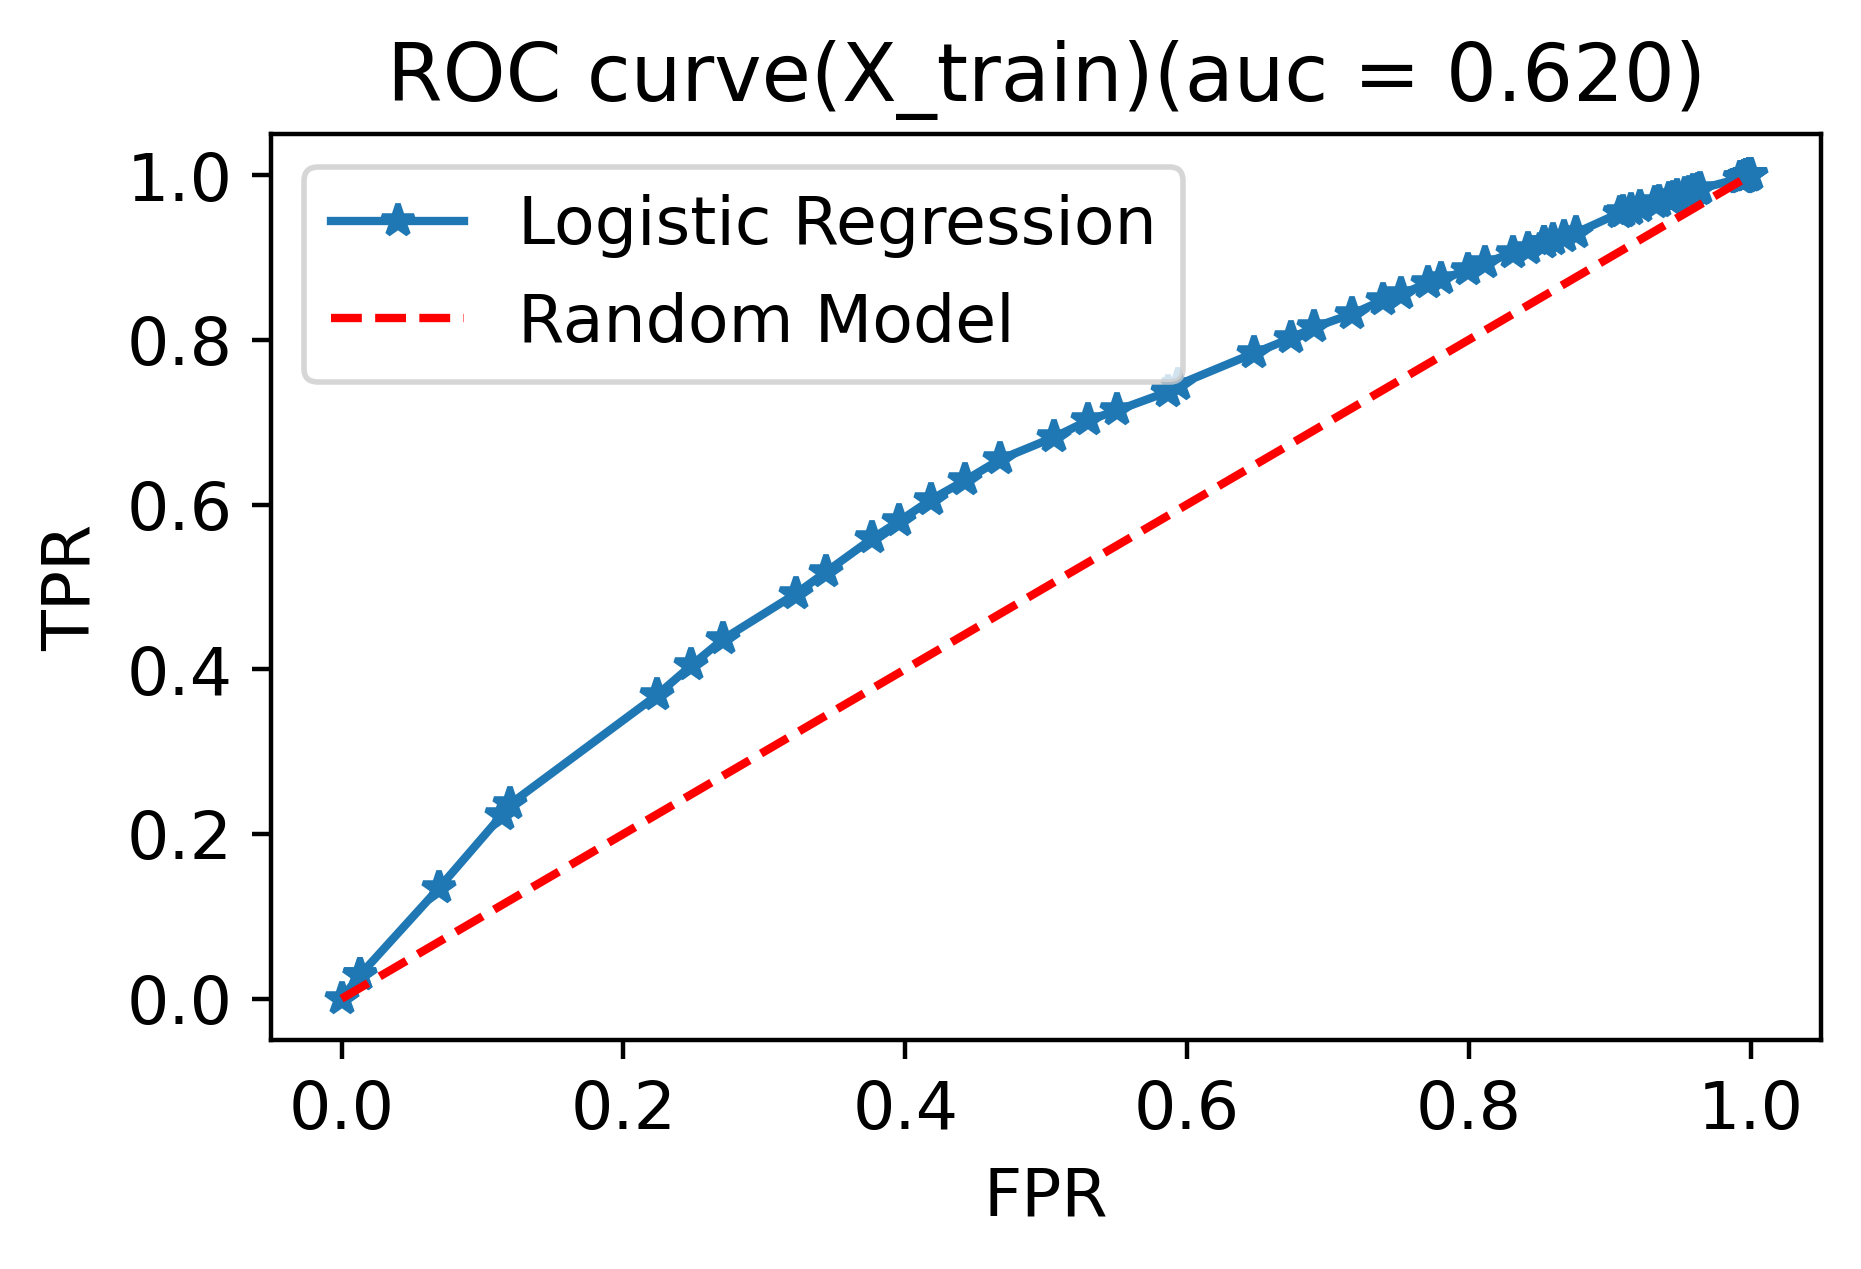

In [76]:
plt.plot(fpr, tpr, '*-')
plt.plot([0,1], [0,1], 'r--')
plt.legend(['Logistic Regression','Random Model'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve(X_train)(auc = %0.3f)'% auc_logistic)
plt.show()

    How is this different, conceptually and quantitatively, from your earlier calculation?
